In [48]:
import pandas as pd

# Load fraud data
fraud_df = pd.read_csv('../data/Fraud_Data.csv',encoding='utf-8')
print(fraud_df.shape)
fraud_df.head()

fraud_df.isnull().sum()
fraud_df.dtypes



(151112, 11)


user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [49]:
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Confirm conversion
fraud_df[['signup_time', 'purchase_time']].head()
fraud_df["time_since_signup"] = (fraud_df["purchase_time"] - fraud_df["signup_time"]).dt.total_seconds()

# Feature 2: hour_of_day
fraud_df["hour_of_day"] = fraud_df["purchase_time"].dt.hour

# Feature 3: day_of_week
fraud_df["day_of_week"] = fraud_df["purchase_time"].dt.day_name()

# Preview
fraud_df[["signup_time", "purchase_time", "time_since_signup", "hour_of_day", "day_of_week"]].head()




,signup_time,purchase_time,time_since_signup,hour_of_day,day_of_week
0,2015-02-24 22:55:49,2015-04-18 02:47:11,4506682.0,2,Saturday
1,2015-06-07 20:39:50,2015-06-08 01:38:54,17944.0,1,Monday
2,2015-01-01 18:52:44,2015-01-01 18:52:45,1.0,18,Thursday
3,2015-04-28 21:13:25,2015-05-04 13:54:50,492085.0,13,Monday
4,2015-07-21 07:09:52,2015-09-09 18:40:53,4361461.0,18,Wednesday


In [50]:
# Summary stats
fraud_df.describe(include='all')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_since_signup,hour_of_day,day_of_week
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000,1.511120e+05,151112.000000,151112
unique,NaN,NaN,NaN,NaN,137956,3,5,2,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,ITUMJCKWEYNDD,SEO,Chrome,M,NaN,NaN,NaN,NaN,NaN,Sunday
freq,NaN,NaN,NaN,NaN,20,60615,61432,88293,NaN,NaN,NaN,NaN,NaN,22015
mean,200171.040970,2015-04-20 00:56:09.511329280,2015-06-16 02:56:38.759952896,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646,4.932029e+06,11.521593,NaN
min,2.000000,2015-01-01 00:00:42,2015-01-01 00:00:44,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000,1.000000e+00,0.000000,NaN
25%,100642.500000,2015-02-18 09:52:48.500000,2015-04-18 14:41:25.500000,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000,2.186754e+06,6.000000,NaN
50%,199958.000000,2015-04-19 04:41:30,2015-06-18 13:46:17.500000,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000,4.926346e+06,12.000000,NaN
75%,300054.000000,2015-06-18 14:47:22.750000128,2015-08-17 18:48:31.500000,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000,7.644524e+06,17.000000,NaN
max,400000.000000,2015-08-18 04:40:29,2015-12-16 02:56:05,154.000000,NaN,NaN,NaN,NaN,76.000000,4.294850e+09,1.000000,1.036797e+07,23.000000,NaN


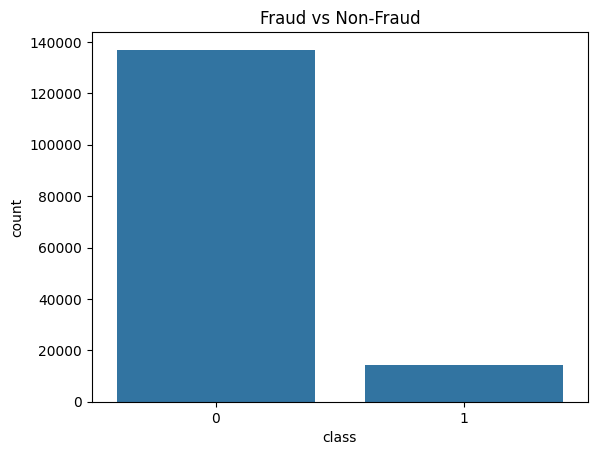

Fraud Ratio:
class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
sns.countplot(data=fraud_df, x='class')
plt.title('Fraud vs Non-Fraud')
plt.show()

# Class ratio
fraud_ratio = fraud_df['class'].value_counts(normalize=True)
print("Fraud Ratio:")
print(fraud_ratio)


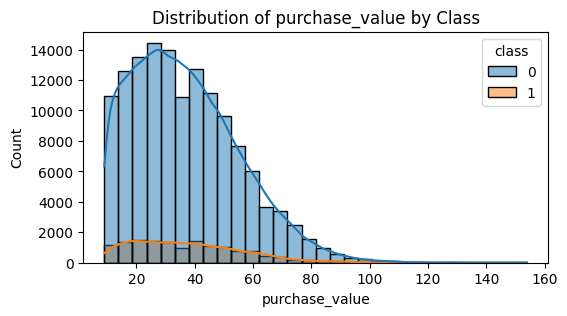

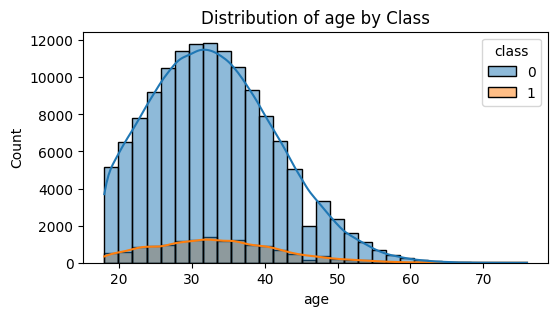

In [52]:
numeric_cols = ['purchase_value', 'age']

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=fraud_df, x=col, hue='class', bins=30, kde=True)
    plt.title(f'Distribution of {col} by Class')
    plt.show()


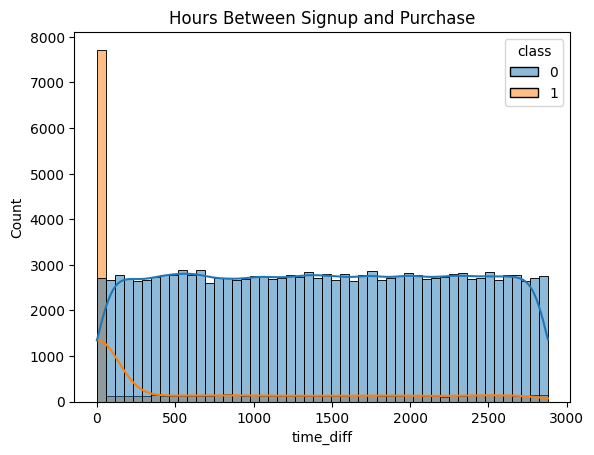

In [53]:
fraud_df['time_diff'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds() / 3600
sns.histplot(data=fraud_df, x='time_diff', hue='class', bins=50, kde=True)
plt.title("Hours Between Signup and Purchase")
plt.show()


In [ ]:
import pandas as pd
import socket
import struct

def ip_to_int(ip):
    if isinstance(ip, str):
        try:
            return struct.unpack("!I", socket.inet_aton(ip))[0]
        except socket.error:
            return None  
    return None 

fraud_df["ip_int"] = fraud_df["ip_address"].apply(ip_to_int)

ip_country = pd.read_csv("../data/IpAddress_to_Country.csv")
ip_country["lower_bound_ip_int"] = ip_country["lower_bound_ip_address"].apply(ip_to_int)
ip_country["upper_bound_ip_int"] = ip_country["upper_bound_ip_address"].apply(ip_to_int)

fraud_df = fraud_df.dropna(subset=["ip_int"])
ip_country = ip_country.dropna(subset=["lower_bound_ip_int", "upper_bound_ip_int"])


fraud_df["ip_int"] = pd.to_numeric(fraud_df["ip_int"], errors='coerce')
ip_country["lower_bound_ip_int"] = pd.to_numeric(ip_country["lower_bound_ip_int"], errors='coerce')
ip_country["upper_bound_ip_int"] = pd.to_numeric(ip_country["upper_bound_ip_int"], errors='coerce')


fraud_df = fraud_df.dropna(subset=["ip_int"])
ip_country = ip_country.dropna(subset=["lower_bound_ip_int", "upper_bound_ip_int"])


fraud_df_sorted = fraud_df.sort_values("ip_int").reset_index(drop=True)
ip_country_sorted = ip_country.sort_values("lower_bound_ip_int").reset_index(drop=True)

fraud_df_sorted["ip_int"] = fraud_df_sorted["ip_int"].astype('int64')
ip_country_sorted["lower_bound_ip_int"] = ip_country_sorted["lower_bound_ip_int"].astype('int64')
ip_country_sorted["upper_bound_ip_int"] = ip_country_sorted["upper_bound_ip_int"].astype('int64')

merged = pd.merge_asof(
    fraud_df_sorted,
    ip_country_sorted,
    left_on="ip_int",
    right_on="lower_bound_ip_int",
    direction="backward"
)


merged = merged[merged["ip_int"] <= merged["upper_bound_ip_int"]]

print(merged[["ip_address", "ip_int", "country"]].head())


Empty DataFrame
Columns: [ip_address, ip_int, country]
Index: []


In [ ]:

print(merged.isnull().sum())


merged_clean = merged.dropna(subset=['ip_address', 'ip_int', 'country', 'signup_time', 'purchase_time'])


merged_clean = merged_clean.drop_duplicates()

print("After cleaning:")
print(merged_clean.isnull().sum())
print(f"Number of rows after cleaning: {len(merged_clean)}")



merged_clean['signup_time'] = pd.to_datetime(merged_clean['signup_time'], errors='coerce')
merged_clean['purchase_time'] = pd.to_datetime(merged_clean['purchase_time'], errors='coerce')


merged_clean = merged_clean.dropna(subset=['signup_time', 'purchase_time'])


categorical_cols = ['source', 'browser', 'sex', 'country']
for col in categorical_cols:
    merged_clean[col] = merged_clean[col].astype('category')



user_id                   0
signup_time               0
purchase_time             0
purchase_value            0
device_id                 0
source                    0
browser                   0
sex                       0
age                       0
ip_address                0
class                     0
time_since_signup         0
hour_of_day               0
day_of_week               0
time_diff                 0
ip_int                    0
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
lower_bound_ip_int        0
upper_bound_ip_int        0
dtype: int64
After cleaning:
user_id                   0
signup_time               0
purchase_time             0
purchase_value            0
device_id                 0
source                    0
browser                   0
sex                       0
age                       0
ip_address                0
class                     0
time_since_signup         0
hour_of_day               0
day_of_week        

In [ ]:

merged_clean['hour_of_day'] = merged_clean['purchase_time'].dt.hour


merged_clean['day_of_week'] = merged_clean['purchase_time'].dt.dayofweek


merged_clean['time_since_signup'] = (merged_clean['purchase_time'] - merged_clean['signup_time']).dt.total_seconds()


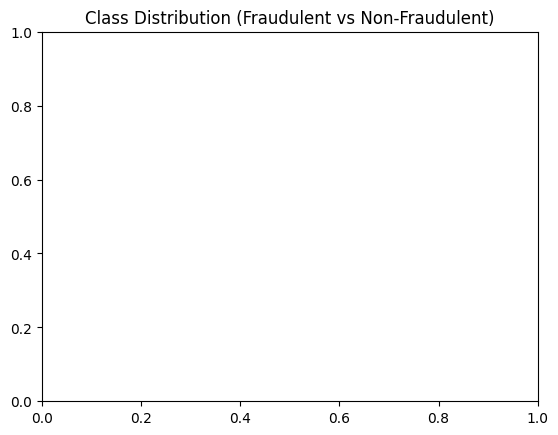

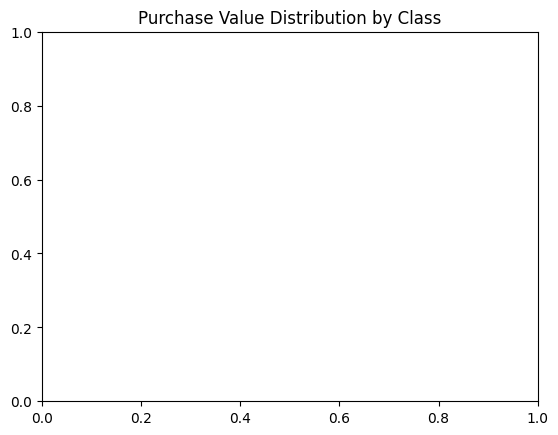

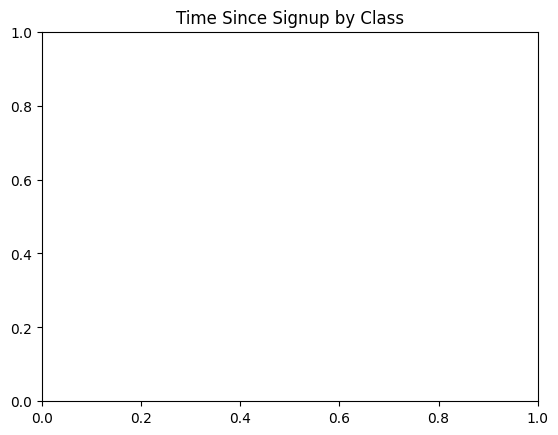

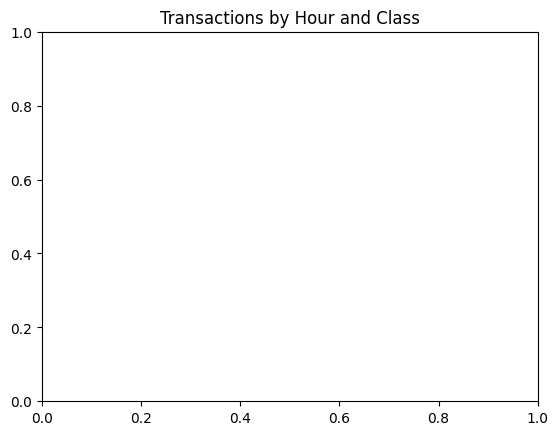

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of fraudulent vs non-fraudulent transactions
sns.countplot(x='class', data=merged_clean)
plt.title('Class Distribution (Fraudulent vs Non-Fraudulent)')
plt.show()

# Distribution of purchase_value by class
sns.boxplot(x='class', y='purchase_value', data=merged_clean)
plt.title('Purchase Value Distribution by Class')
plt.show()

# Average time_since_signup by class
sns.boxplot(x='class', y='time_since_signup', data=merged_clean)
plt.title('Time Since Signup by Class')
plt.show()

# Count by hour of day for fraudulent transactions
sns.countplot(x='hour_of_day', hue='class', data=merged_clean)
plt.title('Transactions by Hour and Class')
plt.show()


In [61]:
print(merged_clean['class'].value_counts(normalize=True))


Series([], Name: proportion, dtype: float64)


In [62]:
X = merged_clean.drop(columns=['class', 'ip_address', 'device_id', 'signup_time', 'purchase_time'])  
y = merged_clean['class']


In [63]:
from sklearn.model_selection import train_test_split

print(fraud_df.shape)
print(ip_country.shape)



(0, 16)
(0, 5)
